# Cleaned Data

In [15]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")
sns.set() 
star_data = pd.read_csv('nasa.csv')

# Different Data Frames
star_data_dropped_1 = star_data.drop(["Neo Reference ID","Name","Est Dia in KM(min)","Est Dia in KM(max)","Est Dia in Miles(min)","Est Dia in Miles(max)","Est Dia in Feet(min)","Est Dia in Feet(max)","Close Approach Date","Relative Velocity km per hr","Orbit ID","Orbit Determination Date","Miles per hour","Miss Dist.(Astronomical)","Miss Dist.(lunar)","Miss Dist.(miles)","Epoch Date Close Approach"],axis=1)
star_data_dropped2 = star_data_dropped_1.drop(columns=['Orbiting Body', 'Equinox'])
star_data_dropped3 = star_data_dropped2.drop(columns=['Epoch Osculation'], axis=1)
star_data_dropped4 = star_data_dropped3.drop(columns=['Est Dia in M(min)', 'Orbital Period'], axis=1)

# Function to plot roc curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr, color = 'green', label = 'ROC')
    plt.plot([0, 1], [0, 1], color = 'purple', linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

---
# Machine Learning

<b> Logistic Regression without skewness correction

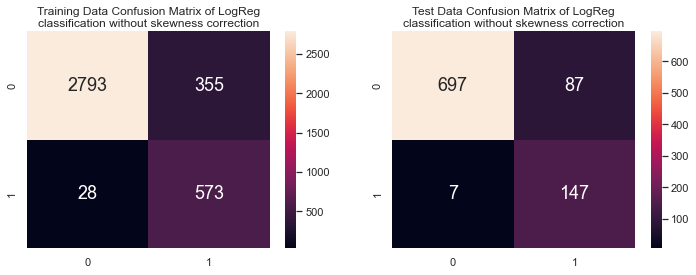

Accuracy(Train): 0.8978394238463591
Accuracy(Test): 0.8997867803837953


In [16]:
# Logistic Regression without correction


y = star_data_dropped4["Hazardous"]
x = star_data_dropped4.drop(["Hazardous"], axis = 1)

# Normalization 
scaler = MinMaxScaler()
scaler.fit(x)
x =  scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)
    
labels = star_data_dropped4.Hazardous.unique()

# Introduce class balancing
# class_weight = 'balanced' uses the values of y to automatically adjust weights inversely proportionate to class frequencies in
# the input data as n_samples / (n_classes *np.bicount(y))
logistic_model = LogisticRegression(solver = 'newton-cg', class_weight='balanced')


# Fitting the Model
logistic_model.fit(x_train, y_train)
y_train_pred = logistic_model.predict(x_train)
y_test_pred = logistic_model.predict(x_test)
accuracy_train = logistic_model.score(x_train,y_train)
accuracy_test = logistic_model.score(x_test, y_test)

# Plot Confusion Matrix (Train and Test)
f,axes = plt.subplots(1,2, figsize=(12,4))
axes[0].set_title('Training Data Confusion Matrix of LogReg\n' + "classification without skewness correction", wrap=True)
axes[1].set_title('Test Data Confusion Matrix of LogReg\n' + "classification without skewness correction", wrap=True)

sns.heatmap(data=confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(data=confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

# Printing Accuracy 
print("Accuracy(Train):", accuracy_train)
print("Accuracy(Test):", accuracy_test)

<b> Accuracy of Train Data = 90%, 
    Accuracy of Test Data = 90%

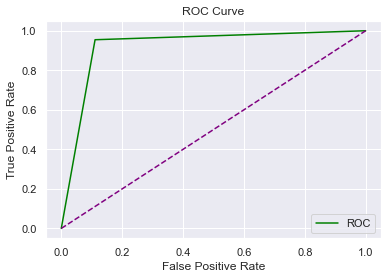

0.9217880333951763

In [17]:
# Evaluation of Logistic Regression Model
fpr, tpr, thresh = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr, tpr)
roc_auc_score(y_test, y_test_pred)

<b> ROC-AUC = 0.92

Feature 0, Score: -10.97197
Feature 1, Score: -1.75090
Feature 2, Score: 0.45178
Feature 3, Score: 0.07113
Feature 4, Score: -2.29227
Feature 5, Score: -17.02607
Feature 6, Score: -0.43398
Feature 7, Score: 0.59289
Feature 8, Score: 0.01291
Feature 9, Score: 0.53284
Feature 10, Score: -0.17663
Feature 11, Score: -0.88901
Feature 12, Score: -0.20902
Feature 13, Score: 0.14656
Feature 14, Score: -0.75167
Feature 15, Score: 0.22933
Feature 16, Score: -0.70860


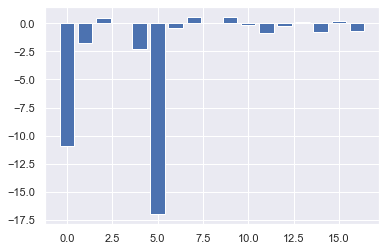

In [18]:
# Ranking of Feature Importance\
importance = logistic_model.coef_[0]
for i,v in enumerate(importance):
    print('Feature %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<b> Top 3 most important features:
    1. Minimum Orbit Intersection
    2. Absolute Magnitude
    3. Orbit Uncertainty

---

<b> Logistic Regression with skewness correction

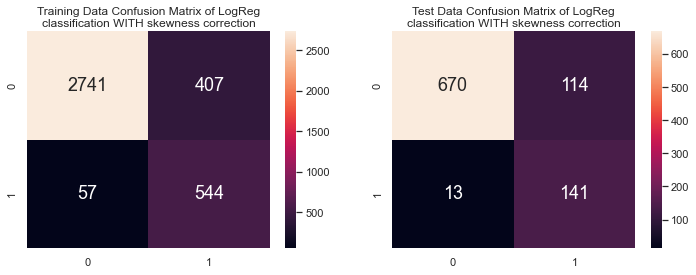

Accuracy(Train): 0.8762336623099494
Accuracy(Test): 0.8646055437100213


In [19]:
# Correction of skewed variables
star_data_dropped4['Est Dia in M(max)'] = np.power((star_data_dropped4['Est Dia in M(max)']), 1/3)
star_data_dropped4['Minimum Orbit Intersection'] = np.power((star_data_dropped4['Minimum Orbit Intersection']), 1/3)

y = star_data_dropped4["Hazardous"]
x = star_data_dropped4.drop(["Hazardous"], axis = 1)

# Normalization
scaler = MinMaxScaler()
scaler.fit(x)
x =  scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

labels = star_data_dropped4.Hazardous.unique()

# Introduce class balancing
# class_weight = 'balanced' uses the values of y to automatically adjust weights inversely proportionate to class frequencies in
# the input data as n_samples / (n_classes *np.bicount(y))
logistic_model = LogisticRegression(solver = 'newton-cg', class_weight='balanced')


# Fitting the Model
logistic_model.fit(x_train, y_train)
y_train_pred = logistic_model.predict(x_train)
y_test_pred = logistic_model.predict(x_test)
accuracy_train = logistic_model.score(x_train,y_train)
accuracy_test = logistic_model.score(x_test, y_test)

# Plot Confusion Matrix (Train and Test)
f,axes = plt.subplots(1,2, figsize=(12,4))
axes[0].set_title('Training Data Confusion Matrix of LogReg\n' + "classification WITH skewness correction", wrap=True)
axes[1].set_title('Test Data Confusion Matrix of LogReg\n' + "classification WITH skewness correction", wrap=True)
sns.heatmap(data=confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(data=confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

# Printing Accuracy 
print("Accuracy(Train):", accuracy_train)
print("Accuracy(Test):", accuracy_test)

<b> Accuracy of Train Data = 88%, 
    Accuracy of Test Data = 86%

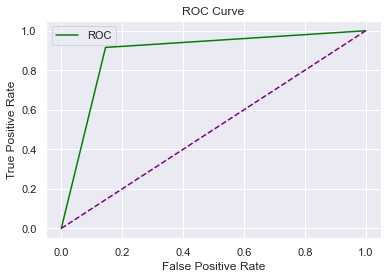

0.8850881261595548

In [20]:
# Evaluation of Logistic Regression Model
# ROC Acuracy Score: 
fpr, tpr, thresh = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr, tpr)
roc_auc_score(y_test, y_test_pred)

<b> ROC-AUC = 0.89

Feature 0, Score: -12.20671
Feature 1, Score: 0.65483
Feature 2, Score: 0.53173
Feature 3, Score: -0.05583
Feature 4, Score: -2.40320
Feature 5, Score: -11.32770
Feature 6, Score: -0.27374
Feature 7, Score: 0.46769
Feature 8, Score: -0.08900
Feature 9, Score: 0.40994
Feature 10, Score: -0.24424
Feature 11, Score: -0.87208
Feature 12, Score: -0.16286
Feature 13, Score: 0.03301
Feature 14, Score: -1.07786
Feature 15, Score: 0.34896
Feature 16, Score: -0.74364


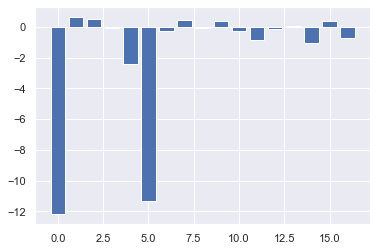

In [21]:
# Ranking of Feature Importance
importance = logistic_model.coef_[0]
for i,v in enumerate(importance):
    print('Feature %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<b> Top 3 most important features:
    1. Absolute Magnitude
    2. Minimum Orbit Intersection
    3. Orbit Uncertainty